# Simplying Option Test Result
---

### 요약
---

본 분석의 실험은 GrowthBook을 통해 23. 11. 02 ~ 23. 11. 22 까지 진행되었습니다. options 페이지 방문자 전원을 대상으로 진행되었으며, 상품 카드 선택 페이지를 제거하고 캘린더를 바로 띄우는 대안과 원안의 전환율을 비교하였습니다.<br><br>
이를 통해 얻은 데이터를 전처리 과정을 통해 유효한 9802명의 데이터를 토대로 분석을 진행하였습니다.<br><br>
옵션 선택 간소화의 효용을 확인하기 위한 목적으로 시행 되었습니다.<br><br>
가설 검증을 위해서는 카이제곱검정을 진행하였습니다.<br><br>
분석 결과 원안과 대안의 결제 페이지 전환율이 다르단 것이 확인 되었습니다.<br><br>
이를 통해 옵션 선택 간소화가 결제페이지 전환에 영향을 미치는 것을 알 수 있었으며, 기존 유저들이 옵션 선택을 하는 동안 불편함을 느꼈기 때문에 작은 기능 추가로도 전환율을 상승키실 수 있던 것으로 추측할 수 있었습니다.<br><br>
본 분석은 실험의 모수가 충분치 않고, 내재적 요인을 고려하지 않았으며, 기술 상 오류가 있을 수 있고, 결제 전환에서는 다른 결과를 초래할 수 있는 점, 실험이 장기간 진행된 점 때문에 실제에 바로 적용할 수 없습니다. 따라서 추가적인 후속 실험이 진행되어야 합니다.

### 목차
---

1. 가설<br>
1-1) 가설 모델 (내재적 요인 포함)<br>
1-2) 가설 모델 (실제 분석 모델)<br>
1-3) 변수 정의<br>
1-4) 실험 개요<br><br>
2. Data<br>
2-1) 전처리 SQL 쿼리<br>
2-2) 분석 데이터<br><br>
3. 가설 검정<br>
3-1) 옵션 선택 간소화는 결제페이지 전환에 영향을 미칠 것이다.<br>
3-2) 데이터 확인<br><br>
4. 결과<br>
4-1) 시사점<br>
4-2) 한계점

## 1. 가설
---

### 1-1) 가설 모델 (내재적 요인 포함)
---

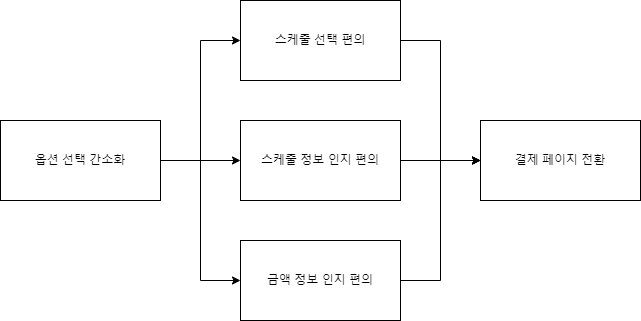

In [6]:
from IPython.display import Image
Image(filename='./image/옵션 간소화 실험-가설(내재적 요인 포함).drawio.png')

- H0: 옵션 선택 간소화는 결제페이지 전환에 영향을 미치지 않을 것이다.
- H1: 옵션 선택 간소화는 결제페이지 전환에 영향을 미칠 것이다.
    - H1-1-1: 옵션 선택 간소화는 유저의 스케줄 선택 편의에 영향을 미칠 것이다.
    - H1-1-2: 옵션 선택 간소화는 유저의 스케줄 정보 인지 편의에 영향을 미칠 것이다.
    - H1-1-3: 옵션 선택 간소화는 유저의 금액 정보 인지 편의에 영향을 미칠 것이다.
    - H1-2-1: 유저의 스케줄 선택 편의는 결제 페이지 전환에 영향을 미칠 것이다.
    - H1-2-2: 유저의 스케줄 정보 인지 편의는 결제 페이지 전환에 영향을 미칠 것이다.
    - H1-2-3: 유저의 금액 정보 인지 편의는 결제 페이지 전환에 영향을 미칠 것이다.

### 1-2) 가설 모델 (실제 분석 모델)
---

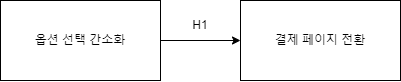

In [7]:
Image(filename='./image/옵션 간소화 실험-가설(실제 분석 모델).drawio.png')

- H0: 옵션 선택 간소화는 결제페이지 전환에 영향을 미치지 않을 것이다.
- H1: 옵션 선택 간소화는 결제페이지 전환에 영향을 미칠 것이다.

### 1-3) 변수 정의
---

- 옵션 선택 간소화: 상품 카드 선택을 제거하여 일정 선택, 룸타입 선택만 하면 결제가 가능하게 하는 기능
- 스케줄 선택 편의: 원하는 상품의 일정을 선택할 수 있는 편의의 정도
- 스케줄 정보 인지 편의: 원하는 상품의 일정을 학인할 수 있는 정보 인지의 편의 정도
- 금액 정보 인지 편의: 원하는 상품의 금액을 학인할 수 있는 정보 인지의 편의 정도
- 결제 페이지 전환: /payment 도메인 (결제 시작 단계)에 유저가 유입되는 것

### 1-4) 실험 개요
---

- 실험 기간: 2023.11.02~2023.11.22
- 모집단: 호텔에삶 이용 고객 전체
- 표본 집단: experiment_viewed가 발생한 모든 유저 (options 페이지 진입 유저)
- 이상치 판단 기준
    - control과 variation 모두 진입한 유저
    - 어드민 유저
    - 브리드 양양 진입 유저 (해당 호텔은 실험 미진행했기 때문에 이로 인한 영향을 최소화 하기 위해 삭제)
- 데이터 소스: BigQuery
- 실험 도구: GrowthBook
- 유효 실험자 수: 9802명

## 2. Data
---

### 2-1) 전처리 SQL 쿼리
---

query.txt 파일 참조

### 2-2) 분석 데이터
---

In [8]:
from google.oauth2 import service_account
from google.cloud import bigquery
import json

# 빅쿼리에서 실험 결과 불러오기
with open('../secret_key/livinginhotel-334006-c751655abe0f.json') as f:
    key = json.load(f)
    
cd = service_account.Credentials.from_service_account_info(key)
client = bigquery.Client(credentials = cd, project = cd.project_id)

# 전체 불러온 후 데이터프레임으로 가공
query = 'SELECT * FROM livinginhotel-334006.experiment_data.simplying_option_test'
query_job = client.query(query)
df = query_job.to_dataframe()

# 빅쿼리에서는 index 설정이 불가하므로 variation을 index로 설정
df = df.set_index('variation')

df

,converted,not_converted
variation,,
variation,53,4880
control,30,4839


## 3. 가설 검정
---

### 3-1) 옵션 선택 간소화는 결제페이지 전환에 영향을 미칠 것이다.
---

- 카이제곱검정 시행

In [9]:
from scipy.stats import chi2_contingency

chi2, p_val, dof, expected =  chi2_contingency(df)

print("Chi-square test result:")
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_val}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-square test result:
Chi-square statistic: 5.5951900835686
P-value: 0.018009856799054536
Degrees of freedom: 1
Expected frequencies:
[[  41.77096511 4891.22903489]
 [  41.22903489 4827.77096511]]


**Result: 해당 가설을 채택합니다.**

### 3-2) 데이터 확인
---

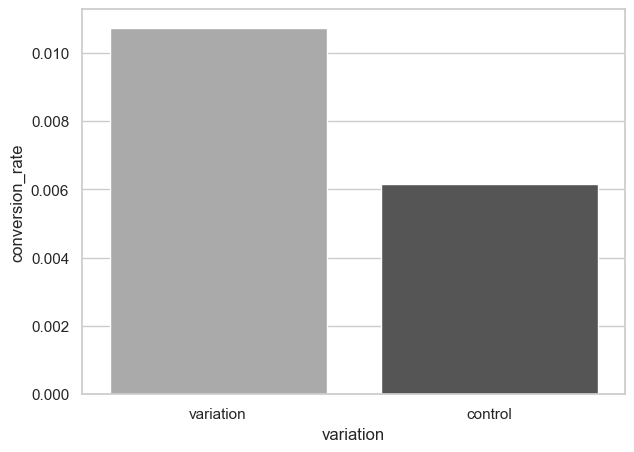

,converted,not_converted,conversion_rate
variation,,,
variation,53,4880,0.010744
control,30,4839,0.006161


In [10]:
import warnings
warnings.filterwarnings(action='ignore')

df['conversion_rate'] = df['converted'] / (df['converted'] + df['not_converted'])

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))
sns.set_theme(style="whitegrid")
sns.barplot(x='variation', y='conversion_rate', palette='binary', data= df)

plt.show()
df

**대안이 원안보다 약 1.7배 전환율이 높습니다.**

## 4. 결과
---

### 4-1) 시사점
---

본 분석의 시사점은 다음과 같습니다.<br><br>
옵션 선택을 간소화 하는 것은 결제페이지 전환과 관계가 있을 것으로 예상됩니다. 현재까지 유저들은 상품 선택에 불편함을 느꼈으며, 이를 해소해주는 것이 옵션퍼널 하락에 일조할 가능성이 큽니다. 매우 간단한 부분을 간소화 시킨 것임에도 불구하고 대안이 전환율이 1.7배 높게 나온 것이므로, 적극적으로 불편함을 해소해주는 기능을 만들어주는 것은 프로덕트 전환에 큰 영향을 줄 것으로 예상됩니다.(결제 이벤트 발생자는 대안 11명, 원안 4명으로 2배 이상 대안이 높음)
<br><br>
따라서 다음과 같은 실험을 제언합니다.<br><br>
1. 스케줄 선택 편의의 영향을 우선으로 하는 경우: 미리 스케줄 정보를 받은 후 자동으로 보여주는 실험<br>
2. 스케줄 정보 인지 편의를 우선으로 하는 경우: 스케줄 정보를 토대로한 필터링 기능<br>
3. 금액 정보 인지 편의를 우선으로 하는 경우: 금액 정보를 토대로한 필터링 기능<br><br>

앞선 실험 모두 개발 리소스가 많이 들 것으로 예상되므로, 최소한의 기능으로 실험을 진행하는 것을 제언합니다.

### 4-2) 한계점
---

본 분석의 한계점은 다음과 같습니다.<br><br>
1. 실험의 모수가 충분하지 않았습니다. 초기 step의 이벤트의 경우는 비교적 많은 양을 획득할 수 있었지만, 전환과 관련된 이벤트의 많은 양의 데이터를 확보하지 못하였습니다. 이에 따라 전환과 관련된 실험 결과 해석에 있어서 오류가 발생할 수 있습니다.<br><br>

2. 내재적 요인을 고려하지 않았습니다. 내재적 요인을 평가하기 위한 양적, 질적 연구가 결여된 상태의 실험이기 때문에 행동의 원인을 추측할 수 없습니다. 이에 따라 정확한 인과관계를 밝힐 수 없으며, 실험 결과 해석에 오류가 발생할 수 있습니다. 기존에 추측한 내재적 요인을 토대로 많은 후속실험이 필요합니다.<br><br>

3. 본 실험은 대면으로 조사한 실험이 아니기 때문에 기술 상 오류가 있을 수 있습니다. GA4(BigQuery) 데이터 집계 과정, 전처리 과정에서 잘못된 데이터가 발생했을 수 있습니다. 또한 내부 직원의 데이터가 집계되었을 가능성이 있으며, 한 명의 유저가 다수의 유저로 인식될 가능성이 있습니다. 따라서 검정 데이터에 결점이 있을 수 있습니다.<br><br>

4. 본 실험은 실제 전환과의 관계를 확인하기 위한 실험이 아니기 때문에, 실제로 적용했을 때 결제 전환에 미치는 영향을 파악하기 예상할 수 없습니다.<br><br>

5. 본 실험은 장기간 진행되었기 때문에, 통제하지 못한 변인들이 영향을 줬을 수 있습니다. 따라서 실험 결과 해석에 오류가 있을 수 있습니다.